<a href="https://colab.research.google.com/github/hafsaAit/forecasting-using-random-forest/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas

In [3]:
pip install scikit-learn

In [4]:
pip install  matplotlib

In [ ]:
pip install skforecast

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
import matplotlib.pyplot as plt



In [7]:
df = pd.read_excel("/content/drive/MyDrive/stage/data (journaliers)/RAIB ET LBEN JOURNALIERS.xlsx")


In [8]:
df['Jour Fiscal'] = pd.to_datetime(df['Jour Fiscal'])



df.set_index('Jour Fiscal', inplace=True)



df = df.asfreq('D')


df['Ventes Totales TTC'] = df['Ventes Totales TTC'].replace(0, float('nan'))

df['Ventes Totales TTC'] = df['Ventes Totales TTC'].fillna(method='ffill')


In [9]:
date_fin_train = '2022-10-01'
df_train = df[df.index < date_fin_train]
df_test = df[df.index >= date_fin_train]

In [10]:
df[f'moving_avg_{3}'] = df['Ventes Totales TTC'].rolling(window=3).mean().shift(1)


df[f'moving_avg_{6}'] = df['Ventes Totales TTC'].rolling(window=6).mean().shift(1)


df[f'moving_avg_{12}'] = df['Ventes Totales TTC'].rolling(window=12).mean().shift(1)


In [11]:
# @title Création des lag
df['sale_lastmonth'] = df['Ventes Totales TTC'].shift(1)
df['sale_3Monthsback'] = df['Ventes Totales TTC'].shift(3)
df['sale_6Monthsback'] = df['Ventes Totales TTC'].shift(6)
df['sale_12Monthsback'] = df['Ventes Totales TTC'].shift(12)


In [12]:
df["Date"] = df.index

In [13]:
df["year"] = df["Date"].dt.year
df["quarter"] = df["Date"].dt.quarter
df["month"] = df["Date"].dt.month

df["DAY"] = df["Date"].dt.day


In [14]:

df.drop(columns=['Date'], inplace = True)


In [15]:
df.dropna(inplace=True)


In [16]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg

forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=123),
    lags=365
)

forecaster.fit(y=df_train['Ventes Totales TTC'])


In [17]:
# Prédictions
steps = len(df_test)
rf_recursive_predictions = forecaster.predict(steps=steps)


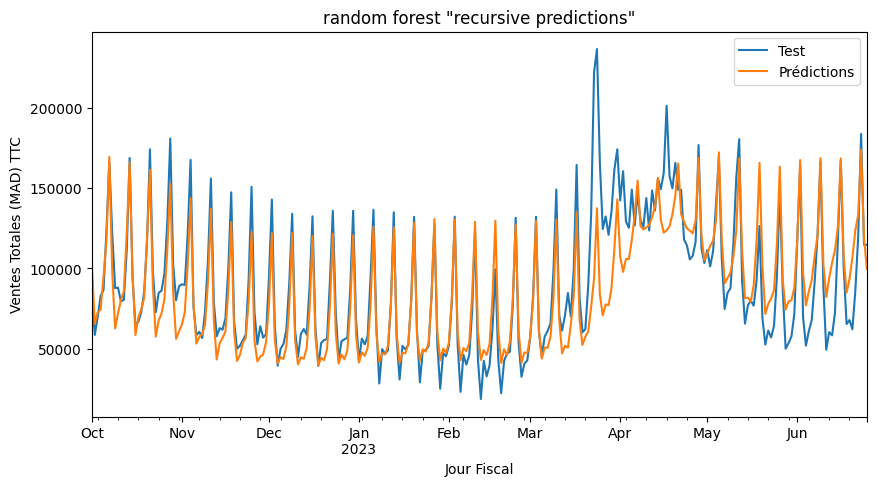

In [18]:
plt.figure(figsize=(10, 5))

df_test['Ventes Totales TTC'].plot(label='Test')
rf_recursive_predictions.plot(label='Prédictions')
plt.xlabel('Jour Fiscal')
plt.ylabel('Ventes Totales (MAD) TTC')
plt.title('random forest "recursive predictions"')
plt.legend()
plt.show()


In [28]:
import pandas as pd

# Obtenir la dernière date disponible dans votre série temporelle de prédictions
end_date = rf_recursive_predictions.index[-1]

# Générer les dates des trois prochains mois après juin 2023
forecast_start_date = pd.Timestamp('2023-07-01')
forecast_end_date = pd.date_range(start=forecast_start_date, periods=90, freq='D')

# Forecast
steps_forecast = len(forecast_end_date)
forecast = forecaster.predict(steps=steps_forecast)

# Créer un index pour les prévisions
forecast_index = pd.date_range(start=end_date + pd.Timedelta(days=1), periods=steps_forecast, freq='D')

# Créer une série pandas pour les prévisions avec l'index approprié
forecast_series = pd.Series(forecast, index=forecast_index)



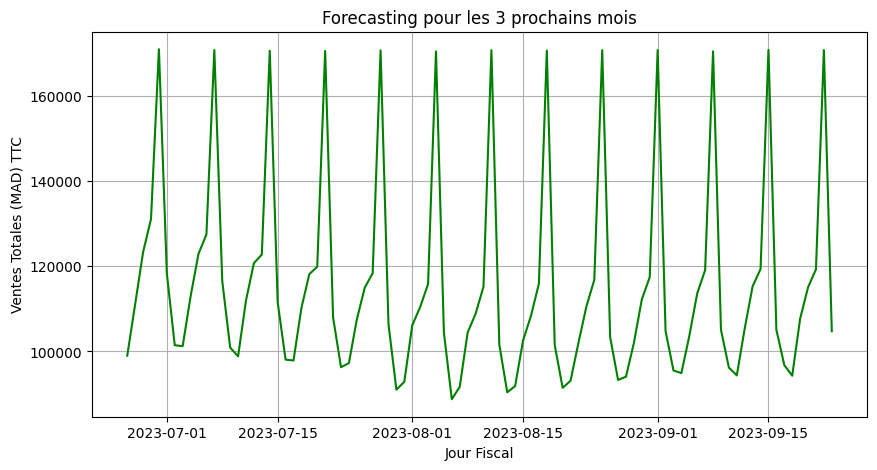

In [29]:

plt.figure(figsize=(10, 5))
plt.plot(forecast_series.index, forecast_series.values, color='green')

plt.xlabel('Jour Fiscal')
plt.ylabel('Ventes Totales (MAD) TTC')
plt.title('Forecasting pour les 3 prochains mois')
plt.grid(True)
plt.show()


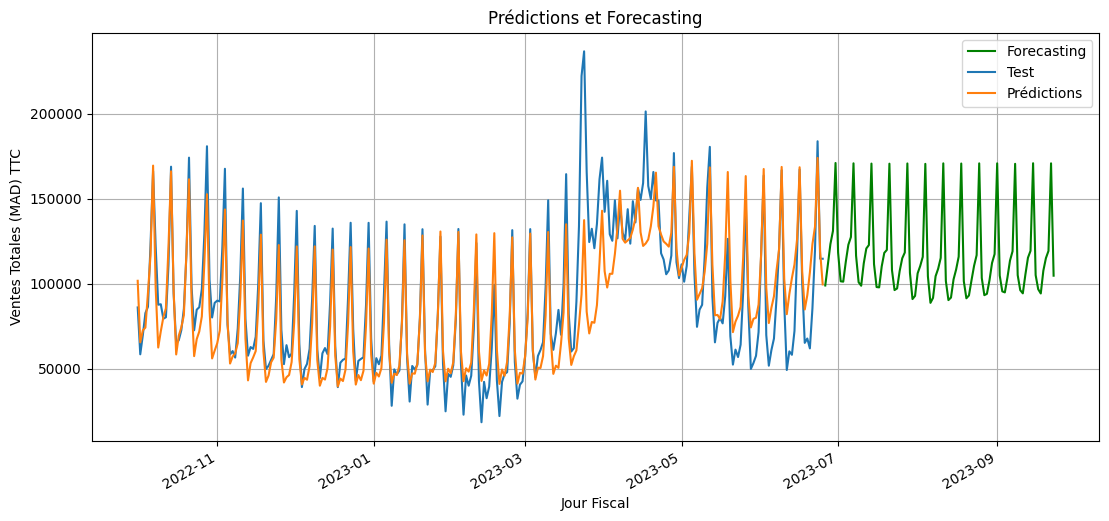

In [27]:

plt.figure(figsize=(13, 6))

# Tracer le forecasting pour les 3 prochains mois
plt.plot(forecast_series.index, forecast_series.values, color='green', label='Forecasting')

# Tracer les données de test et les prédictions
df_test['Ventes Totales TTC'].plot(label='Test')
rf_recursive_predictions.plot(label='Prédictions')

#graphe
plt.xlabel('Jour Fiscal')
plt.ylabel('Ventes Totales (MAD) TTC')
plt.title('Prédictions et Forecasting')
plt.grid(True)
plt.legend()

plt.show()


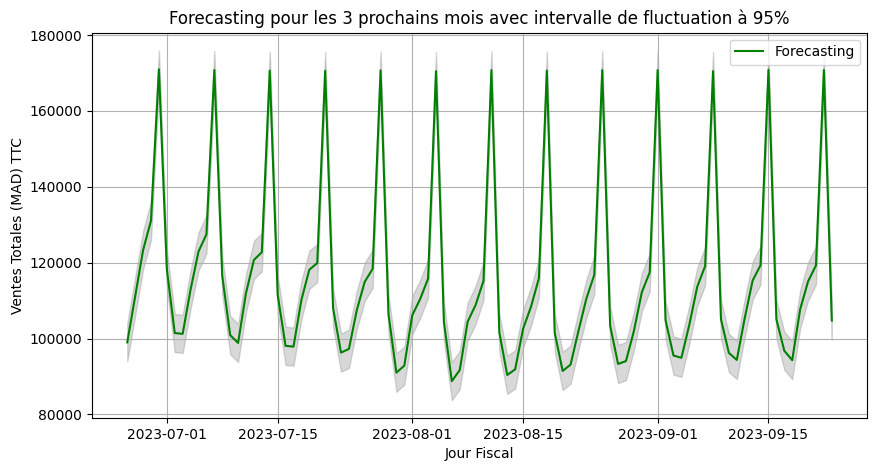

In [37]:
# Calculer les intervalles de fluctuation
n = len(forecast_series)
t_value = 1.96  # Correspond à un intervalle de confiance de 95%
std_error = np.std(forecast_series) / np.sqrt(n)
margin_of_error = t_value * std_error

forecast_lower = forecast_series - margin_of_error
forecast_upper = forecast_series + margin_of_error

# Tracer le graphe de forecasting avec l'intervalle de fluctuation
plt.figure(figsize=(10, 5))
plt.plot(forecast_series.index, forecast_series.values, color='green', label='Forecasting')
plt.fill_between(forecast_series.index, forecast_lower.values, forecast_upper.values, color='grey', alpha=0.3)

# Ajouter des étiquettes et un titre
plt.xlabel('Jour Fiscal')
plt.ylabel('Ventes Totales (MAD) TTC')
plt.title('Forecasting pour les 3 prochains mois avec intervalle de fluctuation à 95%')
plt.grid(True)
plt.legend()

# Afficher le graphique
plt.show()


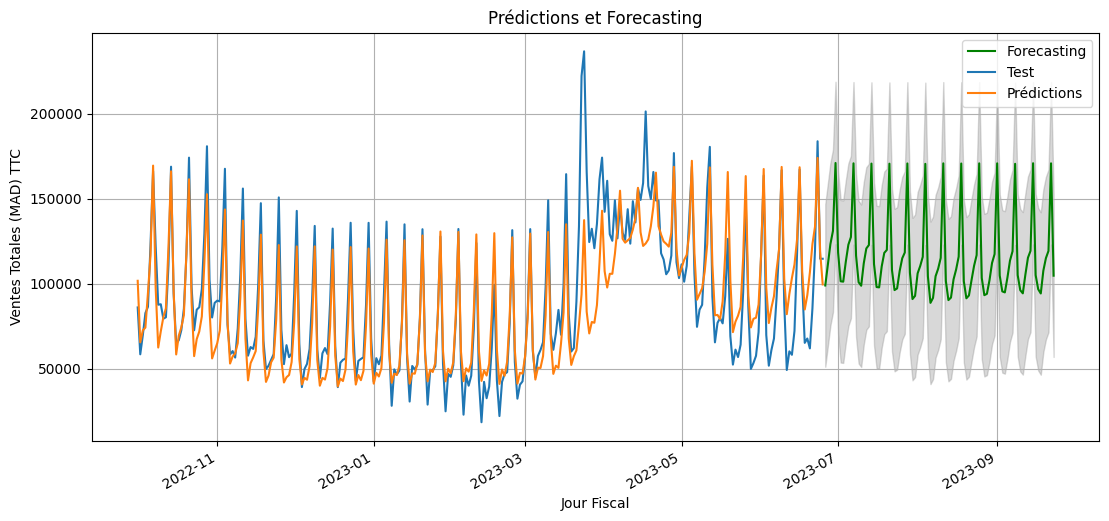

In [39]:

plt.figure(figsize=(13, 6))

# Tracer le forecasting pour les 3 prochains mois
plt.plot(forecast_series.index, forecast_series.values, color='green', label='Forecasting')
plt.fill_between(forecast_series.index, forecast_lower.values, forecast_upper.values, color='grey', alpha=0.3)

# Tracer les données de test et les prédictions
df_test['Ventes Totales TTC'].plot(label='Test')
rf_recursive_predictions.plot(label='Prédictions')

#graphe
plt.xlabel('Jour Fiscal')
plt.ylabel('Ventes Totales (MAD) TTC')
plt.title('Prédictions et Forecasting')
plt.grid(True)
plt.legend()

plt.show()
